In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import json
import math
import datetime

### Load Data

In [2]:
df = pd.read_csv("Toot_Poo_Pee.csv")

### Explore the data

In [3]:
df.shape

(707, 9)

In [4]:
df.head()

,Date,Time,Directional Degree,Direction,Poo/pee,Weather,Temp in F,Wind Direction,Wind Speed
0,9/23/2021,12:13,105,E,Pee,Sunny with Clouds,75,SSE,8.0
1,9/23/2021,12:11,246,SW,Poo,Sunny with Clouds,75,SSE,8.0
2,9/23/2021,18:18,152,SE,Pee,Sunny with Clouds,70,SSE,14.0
3,9/24/2021,12:46,272,W,Pee,Sunny,72,SSE,14.0
4,9/24/2021,12:50,74,NE,Poo,Sunny,72,SSE,14.0


In [5]:
df.describe()

,Directional Degree,Temp in F,Wind Speed
count,707.000000,707.000000,707.000000
mean,205.168317,55.933522,9.020792
std,101.902963,15.230796,5.362601
min,0.000000,18.000000,0.000000
25%,125.500000,45.000000,6.000000
50%,233.000000,57.000000,8.000000
75%,288.000000,68.000000,12.000000
max,368.000000,95.000000,33.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                707 non-null    object 
 1   Time                707 non-null    object 
 2   Directional Degree  707 non-null    int64  
 3   Direction           707 non-null    object 
 4   Poo/pee             707 non-null    object 
 5   Weather             707 non-null    object 
 6   Temp in F           707 non-null    int64  
 7   Wind Direction      707 non-null    object 
 8   Wind Speed          707 non-null    float64
dtypes: float64(1), int64(2), object(6)
memory usage: 49.8+ KB


In [7]:
df['Direction'].describe()

count     707
unique      8
top         W
freq      150
Name: Direction, dtype: object

In [8]:
df['Direction'].value_counts()

W     150
NW    117
SW     96
N      83
NE     80
SE     72
S      67
E      42
Name: Direction, dtype: int64

In [9]:
df['Wind Direction'].value_counts()

N        138
SSE       72
S         60
still     51
SE        51
NNE       47
SW        45
SSW       42
ESE       32
WSW       30
E         29
NE        27
W         23
NNW       18
NW        15
WNW       13
ENE       13
NWN        1
Name: Wind Direction, dtype: int64

[Text(0, 0, 'E'),
 Text(1, 0, 'SW'),
 Text(2, 0, 'SE'),
 Text(3, 0, 'W'),
 Text(4, 0, 'NE'),
 Text(5, 0, 'N'),
 Text(6, 0, 'NW'),
 Text(7, 0, 'S')]

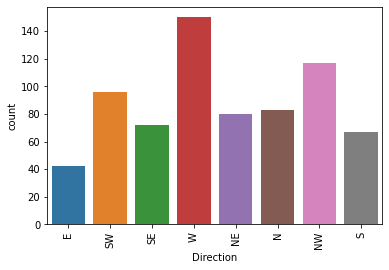

In [10]:
countplot = sns.countplot(x=df["Direction"])
countplot.set_xticklabels(countplot.get_xticklabels(),rotation=90)

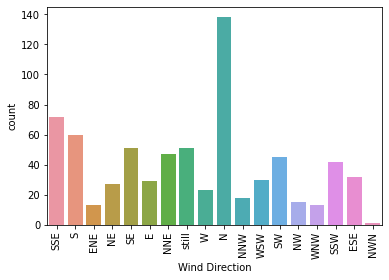

In [11]:
countplot = sns.countplot(x=df["Wind Direction"])
dd = countplot.set_xticklabels(countplot.get_xticklabels(),rotation=90)

### Convert categorical columns into numerical dtypes

In [12]:
categorical_columns = [
    'Poo/pee', 'Weather', 'Wind Direction']
for column in categorical_columns:
    tempdf = pd.get_dummies(df[column], prefix=column)
    df = pd.merge(
        left=df,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    df = df.drop(columns=column)
df.head()

,Date,Time,Directional Degree,Direction,Temp in F,Wind Speed,Poo/pee_Pee,Poo/pee_Poo,Weather_Clear Night,Weather_Clear Night,...,Wind Direction_NWN,Wind Direction_S,Wind Direction_SE,Wind Direction_SSE,Wind Direction_SSW,Wind Direction_SW,Wind Direction_W,Wind Direction_WNW,Wind Direction_WSW,Wind Direction_still
0,9/23/2021,12:13,105,E,75,8.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,9/23/2021,12:11,246,SW,75,8.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,9/23/2021,18:18,152,SE,70,14.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,9/24/2021,12:46,272,W,72,14.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,9/24/2021,12:50,74,NE,72,14.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


### Convert target feature with integer encoder

In [13]:
# Create integer coded 'Direction' feature
df['Dir_codes'] = df['Direction'].astype('category')
df['Dir_codes_ints'] = df['Dir_codes'].cat.codes

# Drop 'Direction' feature
df = df.drop(labels='Direction', axis=1)

df.head()

,Date,Time,Directional Degree,Temp in F,Wind Speed,Poo/pee_Pee,Poo/pee_Poo,Weather_Clear Night,Weather_Clear Night,Weather_Cloudy,...,Wind Direction_SE,Wind Direction_SSE,Wind Direction_SSW,Wind Direction_SW,Wind Direction_W,Wind Direction_WNW,Wind Direction_WSW,Wind Direction_still,Dir_codes,Dir_codes_ints
0,9/23/2021,12:13,105,75,8.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,E,0
1,9/23/2021,12:11,246,75,8.0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,SW,6
2,9/23/2021,18:18,152,70,14.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,SE,5
3,9/24/2021,12:46,272,72,14.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,W,7
4,9/24/2021,12:50,74,72,14.0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,NE,2


In [14]:
mapping_index = df[['Dir_codes', 'Dir_codes_ints']]
mapping_index.head()

,Dir_codes,Dir_codes_ints
0,E,0
1,SW,6
2,SE,5
3,W,7
4,NE,2


In [15]:
# Map the new codes to the direction
mapping_index.value_counts()

Dir_codes  Dir_codes_ints
W          7                 150
NW         3                 117
SW         6                  96
N          1                  83
NE         2                  80
SE         5                  72
S          4                  67
E          0                  42
dtype: int64

In [16]:
# drop Dir_codes
df = df.drop(labels='Dir_codes', axis=1)
df.head()

,Date,Time,Directional Degree,Temp in F,Wind Speed,Poo/pee_Pee,Poo/pee_Poo,Weather_Clear Night,Weather_Clear Night,Weather_Cloudy,...,Wind Direction_S,Wind Direction_SE,Wind Direction_SSE,Wind Direction_SSW,Wind Direction_SW,Wind Direction_W,Wind Direction_WNW,Wind Direction_WSW,Wind Direction_still,Dir_codes_ints
0,9/23/2021,12:13,105,75,8.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,9/23/2021,12:11,246,75,8.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,6
2,9/23/2021,18:18,152,70,14.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,5
3,9/24/2021,12:46,272,72,14.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,7
4,9/24/2021,12:50,74,72,14.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,2


### Define numerical and non-numerical features

In [17]:
def find_num_cols(data):
    """returns list of numeric features"""
    cols = data.select_dtypes(include=[np.number])
    list_num = [print(x) for x in cols.columns]
    return list_num
def find_cat_cols(data):
    """returns list of categorical features"""
    cols = data.select_dtypes(exclude=[np.number])
    list_cat = [print(x) for x in cols.columns]
    return list_cat

In [18]:
print(find_num_cols(df))

Directional Degree
Temp in F
Wind Speed
Poo/pee_Pee
Poo/pee_Poo
Weather_Clear Night
Weather_Clear Night 
Weather_Cloudy
Weather_Light Rain
Weather_Night with Clouds
Weather_Raining
Weather_Snowing
Weather_Sunny
Weather_Sunny with Clouds
Wind Direction_E
Wind Direction_ENE
Wind Direction_ESE
Wind Direction_N
Wind Direction_NE
Wind Direction_NNE
Wind Direction_NNW
Wind Direction_NW
Wind Direction_NWN
Wind Direction_S
Wind Direction_SE
Wind Direction_SSE
Wind Direction_SSW
Wind Direction_SW
Wind Direction_W
Wind Direction_WNW
Wind Direction_WSW
Wind Direction_still
Dir_codes_ints
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [19]:
non_num = pd.Series(find_cat_cols(df))
non_num


Date
Time


0    None
1    None
dtype: object

In [20]:
df['Date']

0      9/23/2021
1      9/23/2021
2      9/23/2021
3      9/24/2021
4      9/24/2021
         ...    
702     6/2/2022
703     6/3/2022
704     6/3/2022
705     6/3/2022
706     6/4/2022
Name: Date, Length: 707, dtype: object

In [21]:
def cng(col):
    n = []
    for i in col:
        a = datetime.datetime.strptime(i, "%m/%d/%Y").date()
        n.append(a)

    col = pd.Series(n)
    return col

In [22]:
df['Date'] = cng(df['Date'])

In [23]:
df['Date']

0      2021-09-23
1      2021-09-23
2      2021-09-23
3      2021-09-24
4      2021-09-24
          ...    
702    2022-06-02
703    2022-06-03
704    2022-06-03
705    2022-06-03
706    2022-06-04
Name: Date, Length: 707, dtype: object

In [ ]:
df['Date'] = pd.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       707 non-null    object 
 1   Time                       707 non-null    object 
 2   Directional Degree         707 non-null    int64  
 3   Temp in F                  707 non-null    int64  
 4   Wind Speed                 707 non-null    float64
 5   Poo/pee_Pee                707 non-null    uint8  
 6   Poo/pee_Poo                707 non-null    uint8  
 7   Weather_Clear Night        707 non-null    uint8  
 8   Weather_Clear Night        707 non-null    uint8  
 9   Weather_Cloudy             707 non-null    uint8  
 10  Weather_Light Rain         707 non-null    uint8  
 11  Weather_Night with Clouds  707 non-null    uint8  
 12  Weather_Raining            707 non-null    uint8  
 13  Weather_Snowing            707 non-null    uint8  

In [26]:
df = df.iloc[:, 2:]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Directional Degree         707 non-null    int64  
 1   Temp in F                  707 non-null    int64  
 2   Wind Speed                 707 non-null    float64
 3   Poo/pee_Pee                707 non-null    uint8  
 4   Poo/pee_Poo                707 non-null    uint8  
 5   Weather_Clear Night        707 non-null    uint8  
 6   Weather_Clear Night        707 non-null    uint8  
 7   Weather_Cloudy             707 non-null    uint8  
 8   Weather_Light Rain         707 non-null    uint8  
 9   Weather_Night with Clouds  707 non-null    uint8  
 10  Weather_Raining            707 non-null    uint8  
 11  Weather_Snowing            707 non-null    uint8  
 12  Weather_Sunny              707 non-null    uint8  
 13  Weather_Sunny with Clouds  707 non-null    uint8  

In [28]:
small_sample = df.sample(n=100)

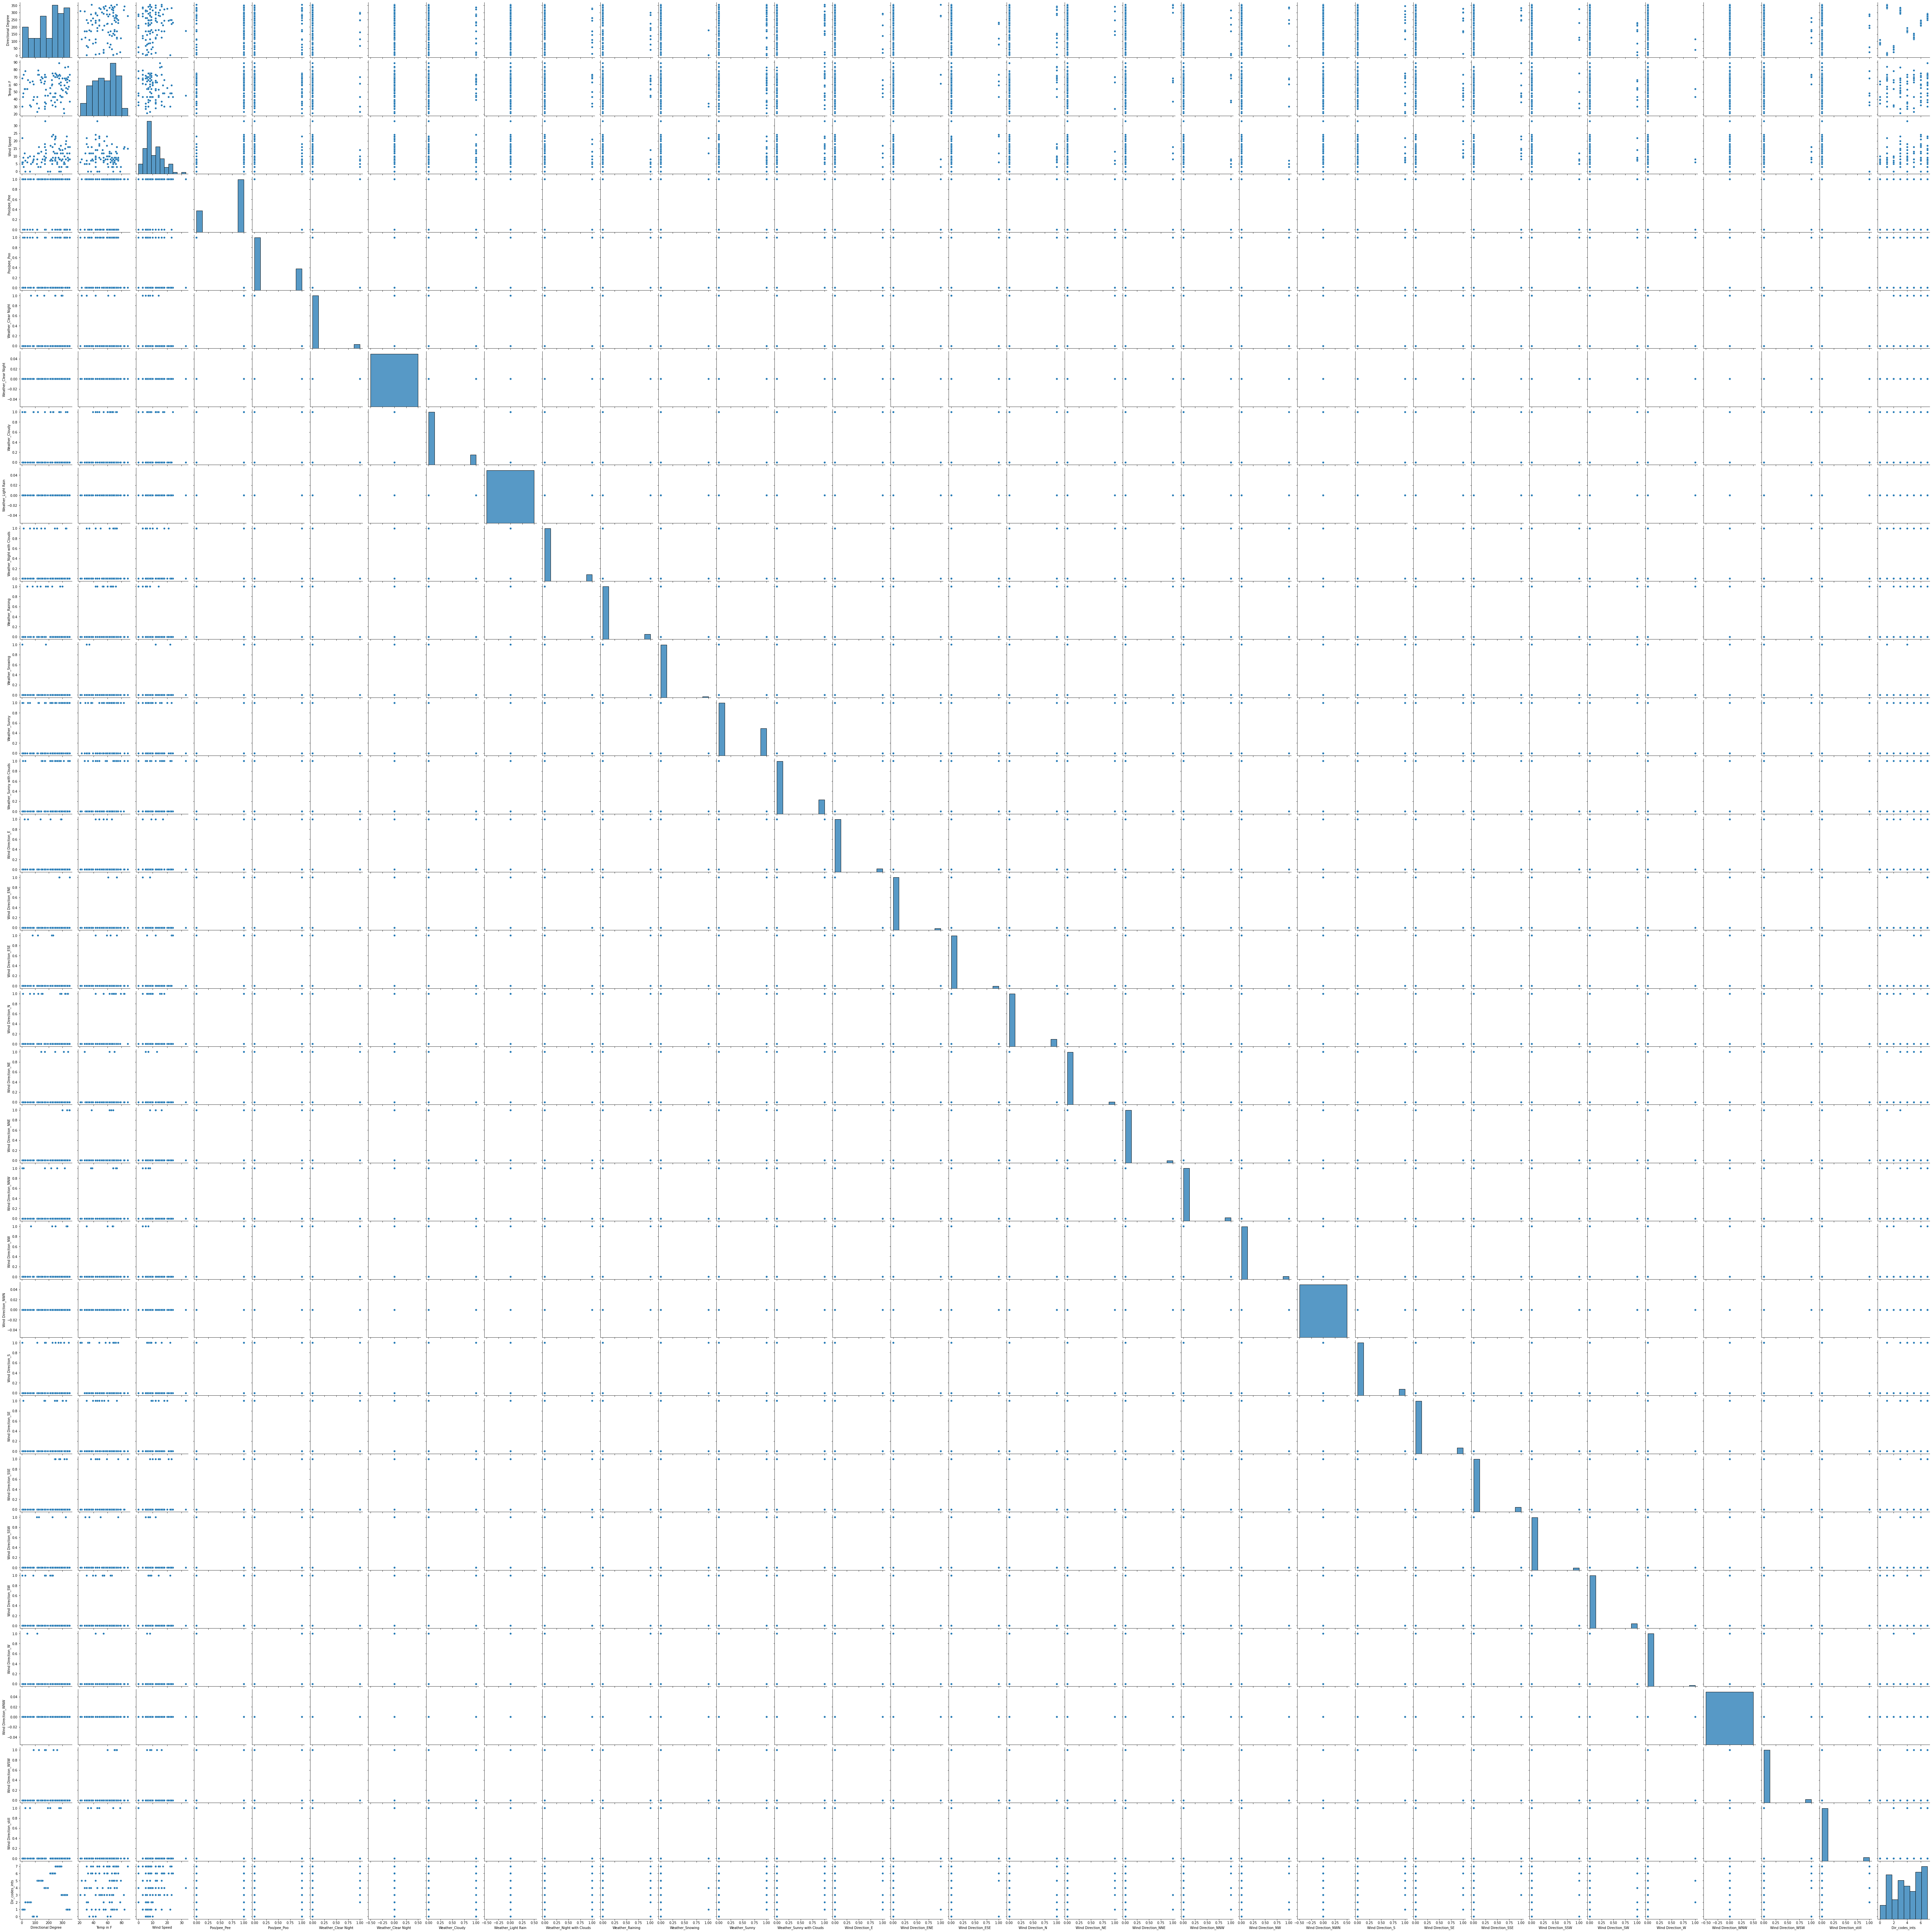

In [29]:
sns.pairplot(small_sample)